In [1]:
from utility_bferror import *
from utility_bfcombiner import *

In [2]:
covar = np.load('../data/covar.npy')
sigma = np.load('../data/sigma.npy')
beta0 = np.array([0.10883379, 0.10800187, 0.10689639,
                  0.11196685, 0.10982913, 0.10544397,
                  0.10505873, 0.10762646, 0.10785138,
                  0.11019370, 0.10963078, 0.10709402])

# 1. Uncertainty of Combined BR

In [3]:
combiner = bfCombiner_theta(covar, sigma, beta0)
sigma, corr = combiner.paramSigma()

In [4]:
combiner.paramLS

array([ 0.10861338,  0.10918771,  0.1057904 ,  0.0072545 , -0.0088911 ,
        0.07672374,  1.24167793, -0.845152  ,  0.21393448, -1.60669547,
       -0.12549239,  0.21773375, -0.16557869,  0.17306618,  0.12097954,
        0.03415773,  0.01367474, -0.27113226,  0.77928027, -0.20015304,
       -0.05037741,  0.08500088, -0.13632009, -0.12079062,  1.11213066])

In [5]:
sigma/0.1080

array([0.02074223, 0.02176791, 0.06452892, 9.22932192, 9.28555691,
       9.15922329, 7.36288985, 8.99058303, 5.64975583, 7.86893533,
       8.79974279, 8.94377089, 9.14252967, 9.30907925, 9.24422569,
       9.25535767, 9.13528203, 8.55596754, 8.75276064, 9.27577161,
       9.26299756, 7.37748011, 9.16154386, 6.05451238, 9.05893988])

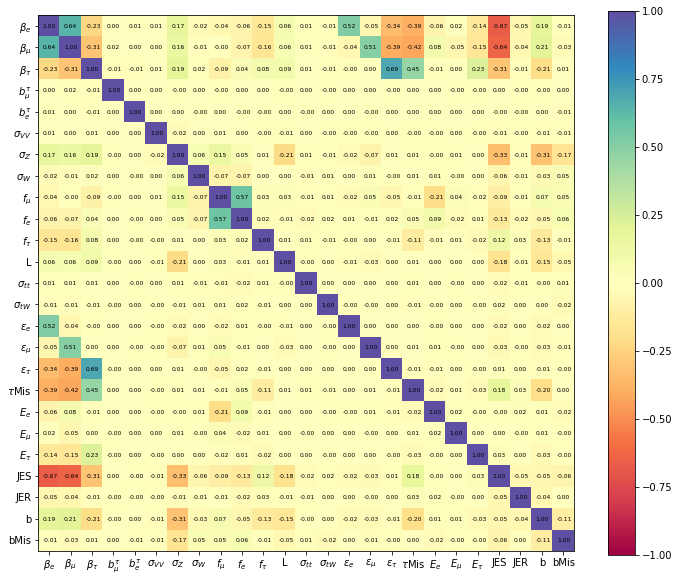

In [6]:
lablesName = [r'$\beta_e$',r'$\beta_\mu$',r'$\beta_\tau$',
              r"$b^\tau_\mu$",r"$b^\tau_e$",
              r"$\sigma_{VV}$",r"$\sigma_{Z}$",r"$\sigma_{W}$",
              r"$f_{\mu}$",r"$f_{e}$",r"$f_{\tau}$","L",r"$\sigma_{tt}$",r"$\sigma_{tW}$",
              r"$\epsilon_e$",r"$\epsilon_\mu$",r"$\epsilon_\tau$",r'$\tau$Mis',
              r"$E_e$",r"$E_\mu$",r"$E_\tau$",
              "JES","JER","b","bMis"]
lablesPos = np.arange(0,25,1)  
plt.figure(figsize=(12,10),facecolor='w')
plt.imshow(corr,cmap='Spectral',vmax=1,vmin=-1)
plt.xticks(lablesPos,lablesName)
plt.yticks(lablesPos,lablesName)
for i in lablesPos:
    for j in lablesPos:
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(corr[i,j]),fontsize=6 )
plt.colorbar()
plt.savefig('../plots/combine/covarMatrix_theta.png',dpi=300)


In [25]:
len(lablesName)

25

In [64]:
        param = combiner.param0
        param_beta = param[0:3]
        param_syst = param[3:]#.reshape(-1,1,1)
        
        beta = np.r_[param_beta,
                     param_beta,
                     param_beta,
                     param_beta]
        
        chiquared = 0
        
        delta = beta-combiner.beta0
        chiquared = delta.dot( combiner.var_stat.dot(delta) )

In [66]:
        for i in range(combiner.nTheta):
            
            delta = beta-combiner.beta0
            delta += combiner.bias_syst[i] * param_syst[i]
            chiquared += delta.dot( param_syst[i].dot(delta) )

AttributeError: 'numpy.float64' object has no attribute 'dot'

In [68]:
param_syst[i]

0.1

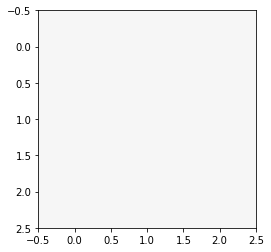

In [5]:
plt.imshow(corr,cmap='PRGn_r',vmax=1,vmin=-1)

In [6]:
sigma

array([0., 0., 0.])

In [18]:
corr

NameError: name 'corr' is not defined

In [113]:
# statisitcal
combiner = bfCombiner(covar[0], beta0)
sigma, corr = combiner.paramSigma()
print(sigma/0.1080*100)

# total
combiner = bfCombiner(covarTotal, beta0)
sigma, corr = combiner.bfvar()
print(sigma/0.1080*100)

showParameterCov(corr)
plt.savefig('../plots/covarMatrix_beta.png',dpi=300)

[0.37821548 0.3281263  0.81389775]


NameError: name 'covarTotal' is not defined

In [4]:
combiner = bfCombiner(covarTotal, beta0, paramTypy='r')
sigma, corr = combiner.bfvar()
rVar = np.outer(sigma,sigma)*corr
rVar = rVar[0:2,0:2]
invVar = np.linalg.pinv(rVar)

r1_mean, r2_mean = 1,1#combiner.paramLS[0], combiner.paramLS[1]

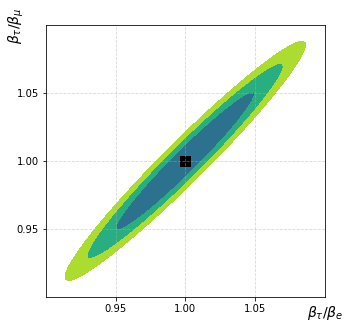

In [5]:
x = np.linspace(0.9, 1.1, 100)
y = np.linspace(0.9, 1.1, 100)
X, Y = np.meshgrid(x, y)


nll  = invVar[0,0]*(X-r1_mean)**2 
nll += invVar[1,1]*(Y-r2_mean)**2
nll += invVar[0,1]*(Y-r2_mean)*(X-r1_mean)*2
nll *= 2


plt.figure(figsize=(5,5),facecolor='w')


plt.contourf(X, Y, nll, levels=[0,1,2,3],vmax=3,vmin=-1)
plt.scatter(r1_mean, r2_mean, c='w')
plt.xticks([0.95,1,1.05])
plt.yticks([0.95,1,1.05])


plt.scatter(1, 1, c='k',marker='s',s=100)
plt.grid(True,alpha=0.5,linestyle='--')

plt.xlabel(r'$\beta_\tau / \beta_e$',fontsize=14,position=(1,1),labelpad=-10)
plt.ylabel(r'$\beta_\tau / \beta_\mu$',fontsize=14,position=(1,1),labelpad=-10)

plt.savefig('../plots/sigma.png',dpi=300)



In [19]:
test = array([[ 7033.99389681, -6689.2625027 ],
       [-6689.2625027 ,  6748.24428315]])

In [28]:
np.pad(test,((0,2),(0,2)),'constant', constant_values=0)

array([[ 7033.99389681, -6689.2625027 ,     0.        ,     0.        ],
       [-6689.2625027 ,  6748.24428315,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ]])

# 2. Plot Var Matrix

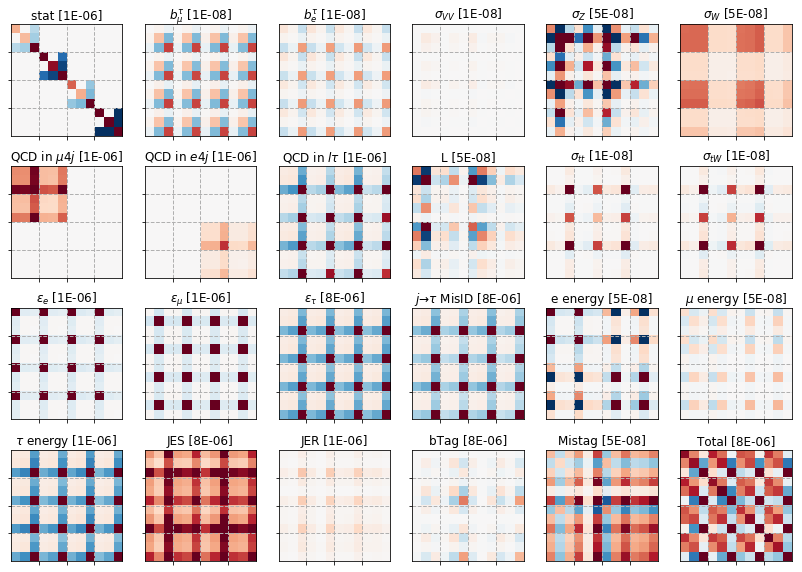

In [24]:
plt.figure(figsize=(14,10),facecolor='w')
showCovar(covar,sameCNorm=False)
plt.savefig('../plots/covarMatrix.png',dpi=300)

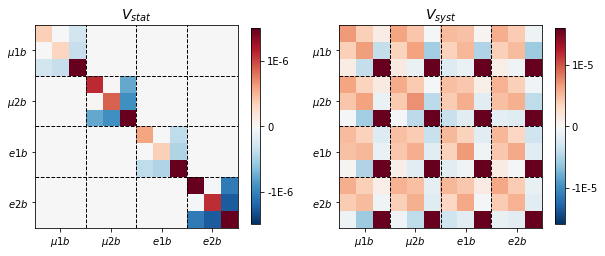

In [10]:
plt.figure(figsize=(10,4),facecolor='w')

plt.subplot(1,2,1)
mtx = covar[0] #* 10000
showSingleCovar(mtx, norm= 1.5e-6, titleName=r'$V_{stat}$')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])

plt.subplot(1,2,2)

mtx = np.sum(covar[1:],axis=0) #* 10000
showSingleCovar(mtx, norm= 16e-6, titleName=r'$V_{syst}$')
cbar = plt.colorbar( ticks=[-10e-6, 0, 10e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-5', '0', '1E-5'])


plt.savefig('../plots/covarMatrix_total.png',dpi=300)